# Recipe Recomendation Project

### Trabalho Final - TERA - Recomendação
Francisco Ottoni, Giovana Bandinelli, Madson Nascimento de Lima e Sonia Gondo

Fonte do banco de dados: https://www.kaggle.com/code/takuyaishii/recipe-preprocessing/data

Colunas da base:

RecipeId : Id da receita

Name : Nome da receita

CookTime : Tempo de cozimento

PrepTime : Tempo de preparo

TotalTime : Tempo total de preparo (Cozimento + Preparo)

Description : Descrição da receita

Images : link das imagens

RecipeCategory : Categoria da receita

Keywords : Palavras chaves da receita

RecipeIngredientQuantities: Quantidade de cada ingrediente

RecipeIngredientParts: Ingredientes

AggregatedRating: Média das avaliações da receita

Calories: Valor colórico da receita

RecipeServings: Quantidade de pessoas servidas

RecipeYield: Rendimento da receita

RecipeInstructions: Instruções da receita

reviews_in_dict: Avaliações da receita no formato de um dicionário

### Bibliotecas e Configurações

In [1]:
#import de libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import nltk

In [2]:
#import From
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

In [3]:
warnings.filterwarnings('ignore')

### Leitura dos dados

In [4]:
recipes = pd.read_csv('recipe_10000.csv')
recipes.head()

,Unnamed: 0,index,RecipeId,Name,CookTime,PrepTime,TotalTime,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict
0,0,0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,Make and share this Low-Fat Berry Blue Frozen ...,['https://img.sndimg.com/food/image/upload/w_5...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...","{579149: {'Rating': 5, 'Review': 'Yummy, yummy..."
1,1,4,39,Biryani,PT25M,PT4H,PT4H25M,Make and share this Biryani recipe from Food.com.,['https://img.sndimg.com/food/image/upload/w_5...,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,"{361851: {'Rating': 3, 'Review': 'I have an In..."
2,2,5,40,Best Lemonade,PT5M,PT30M,PT35M,This is from one of my first Good House Keepi...,['https://img.sndimg.com/food/image/upload/w_5...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...","{34854: {'Rating': 5, 'Review': ""My favourite ..."
3,3,14,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,This dish is best prepared a day in advance to...,['https://img.sndimg.com/food/image/upload/w_5...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...","{48870: {'Rating': 5, 'Review': 'I thought thi..."
4,4,16,42,Cabbage Soup,PT30M,PT20M,PT50M,Make and share this Cabbage Soup recipe from F...,['https://img.sndimg.com/food/image/upload/w_5...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...","['46', '4', '1', '2', '1']","['plain tomato juice', 'cabbage', 'onion', 'ca...",4.5,103.6,4.0,NaN,['Mix everything together and bring to a boil....,"{46368: {'Rating': 5, 'Review': 'This is a ver..."


### EDA

In [5]:
#informações sobre nome de colunas, numero de linhas e dtype

recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  10000 non-null  int64  
 1   index                       10000 non-null  int64  
 2   RecipeId                    10000 non-null  int64  
 3   Name                        10000 non-null  object 
 4   CookTime                    10000 non-null  object 
 5   PrepTime                    10000 non-null  object 
 6   TotalTime                   10000 non-null  object 
 7   Description                 10000 non-null  object 
 8   Images                      10000 non-null  object 
 9   RecipeCategory              10000 non-null  object 
 10  Keywords                    10000 non-null  object 
 11  RecipeIngredientQuantities  10000 non-null  object 
 12  RecipeIngredientParts       10000 non-null  object 
 13  AggregatedRating            1000

In [6]:
#exibindo o número de linhas e colunas iniciais

print('nosso dataset contém {} linhas e {} colunas.'.format(recipes.shape[0], recipes.shape[1]))

nosso dataset contém 10000 linhas e 19 colunas.


In [7]:
#Contando valores únicos

recipes.nunique()

Unnamed: 0                    10000
index                         10000
RecipeId                      10000
Name                           9653
CookTime                        152
PrepTime                         74
TotalTime                       328
Description                    9861
Images                        10000
RecipeCategory                  173
Keywords                       8084
RecipeIngredientQuantities     9539
RecipeIngredientParts          9920
AggregatedRating                  9
Calories                       5917
RecipeServings                   40
RecipeYield                    1472
RecipeInstructions             9999
reviews_in_dict               10000
dtype: int64

In [8]:
#contagem de valores nulos por coluna

recipes.isnull().sum().sort_values(ascending=False)

RecipeYield                   7001
RecipeServings                3853
Unnamed: 0                       0
Keywords                         0
RecipeInstructions               0
Calories                         0
AggregatedRating                 0
RecipeIngredientParts            0
RecipeIngredientQuantities       0
RecipeCategory                   0
index                            0
Images                           0
Description                      0
TotalTime                        0
PrepTime                         0
CookTime                         0
Name                             0
RecipeId                         0
reviews_in_dict                  0
dtype: int64

In [9]:
#categorias das receitas

recipes['RecipeCategory'].unique()

array(['Frozen Desserts', 'Chicken Breast', 'Beverages', 'Soy/Tofu',
       'Vegetable', 'Chicken', 'Pie', 'Dessert', 'Southwestern U.S.',
       'Stew', 'Lactose Free', 'Sauces', 'Brazilian', 'Potato', 'Cheese',
       'Lamb/Sheep', 'Scones', 'Drop Cookies', 'Weeknight',
       'Quick Breads', 'Low Protein', 'Curries', '< 60 Mins', '< 30 Mins',
       'Lunch/Snacks', 'Steak', 'Lobster', 'Pork', 'Chicken Livers',
       'Crab', 'Very Low Carbs', 'Chowders', 'Meat', 'Breakfast',
       'Hungarian', 'German', 'Onions', 'Bar Cookie', 'Indonesian',
       'Lentil', 'High Protein', 'Greek', 'Pineapple', 'Peppers',
       'Cauliflower', 'Breads', 'Yeast Breads', 'Fruit', 'Free Of...',
       'European', 'Mexican', 'Beans', 'One Dish Meal', 'Savory Pies',
       'Cheesecake', 'Candy', 'Long Grain Rice', 'Whole Chicken',
       '< 15 Mins', 'Rice', 'Apple', 'Tuna', 'Spaghetti', 'Jellies',
       'Gelatin', 'Healthy', 'Low Cholesterol', 'Shakes', 'Chutneys',
       'Tex Mex', 'Veal', 'Mussels',

In [10]:
recipes['RecipeCategory'].value_counts()

Dessert          1037
Lunch/Snacks      930
Vegetable         730
One Dish Meal     616
Chicken           510
                 ... 
Danish              1
Goose               1
African             1
Ethiopian           1
Wild Game           1
Name: RecipeCategory, Length: 173, dtype: int64

In [11]:
#quantidade de receitas por tempo total de preparo

recipes['TotalTime'].value_counts()

PT30M        712
PT25M        660
PT40M        657
PT35M        605
PT45M        545
            ... 
PT25H50M       1
PT7H25M        1
PT288H30M      1
PT336H8M       1
PT24H5M        1
Name: TotalTime, Length: 328, dtype: int64

**RESULTADOS:** 
- nosso dataset contém 10000 linhas e 19 colunas;
- Só existem Valores Nulos em Duas colunas que são: RecipeYield e RecipeServings;
- Existem colunas que tentam repetir o index e não significam nada para o projeto (unnamed:0 e index) além de uma coluna com links de imagens que não vamos utilizar nesse momento;
- Existem muitas entradas difentes nas variavies de recipe category;
- Nosso dataset possuem váriaveis de tempo que são díficeis de serem útilizadas antes de realizar alguma transformação.

### Primeiras alterações, Transformação nas váriaveis de tempo e criação de colunas

In [12]:
#drop de colunas que não serão utilizadas

recipes.drop(columns=['Unnamed: 0', 'index', 'Images'], inplace=True)

In [13]:
#Usando regex para criar coluna de Horas

recipes['hours'] = recipes.TotalTime.str[2:].map(lambda x: re.search("^(.*?)[H]", x))
recipes['hours'] = recipes['hours'].apply(lambda x: 0 if x is None else x.group()[:-1])

In [14]:
#usando regex para criar coluna de minutos

recipes['minutes'] = recipes.TotalTime.str[2:].map(lambda x: re.search("[0-9]{1,}M", x))
recipes['minutes'] = recipes['minutes'].apply(lambda x: 0 if x is None else x.group()[:-1])

In [15]:
#Criando coluna de tempo total em minutos

recipes['totaltime_min'] = (recipes["hours"].astype("int64") * 60) + recipes['minutes'].astype("int64")

##### old version

#Criando função para limpar as variaveis de tempo (remover o termo 'PT' da string):

def time_cleaning1(x):
    return x[2:]

#removendo os termos 'M', 'S' e 'H' das váriaveis de tempo e transformando todas para minutos:

def time_cleaning2(x):

        
#transformando tempo quando a formatação contem 3 casas:

    if len(x) == 3:
        
        if x[2] == 'M':
            return int(x[:2])
        
        elif x[2] == 'H':
            new_value1 = int(x[:2])
            new_value2 = new_value1 * 60
            return new_value2

#transformando tempo quando a formatação contem 2 casas:   
    
    elif len(x) == 2:
        
        if x[1] == 'M':
            return int(x[0])
        
        elif x[1]== 'H':
            new_value1 = int(x[0])
            new_value2 = new_value1 * 60
            return new_value2
        
        elif x[1] == 'S':
            return 0

#transformando tempo quando a formatação contem 4 casas:
    elif len(x)== 4:
        
        if x[1] == 'H':
            horas =  int(x[0])
            min = int(x[2])
            new_value1 = horas *60
            new_value2 = new_value1 + min
            return new_value2
        
        elif x[-1] == 'H':
            new_value = int(x[:3]) * 60
            return new_value
                   
#transformando tempo quando a formatação contem 5 casas:

    elif len(x) == 5:
        
        if x[1] == 'H':
            horas = int(x[0])
            min = int(x[2:4])
            new_value1 = horas * 60
            new_value2 = new_value1 + min
            return new_value2
            
        elif x[2] == 'H':
            horas = int(x[:2])
            min = int(x[3])
            new_value1 = horas * 60
            new_value2 = new_value1 + min
            return new_value2
        
        elif x[4] == 'H':
            new_value = int(x[:4])*60
            return new_value
            

#transformando tempo quando a formatação contem 6 casas:

    elif len(x) == 6:
        
        if x[2] == 'H':
            horas = int(x[:2])
            min = int(x[3:5])
            new_value1 = horas*60
            new_value2 = new_value1 + min
            return new_value2
            

#aplicando transformação de tempo em CookTime

recipes['cooktime_min'] = recipes.CookTime.map(time_cleaning1)
recipes['cooktime_min'] = recipes.cooktime_min.map(time_cleaning2)

#amostra do resultado

recipes.cooktime_min.head()

#aplicando transformação de tempo na variavel Preptime

recipes['preptime_min'] = recipes.PrepTime.map(time_cleaning1)
recipes['preptime_min'] = recipes.preptime_min.map(time_cleaning2)

#aplicando transformação na coluna TotalTime

recipes['totaltime_min'] = recipes.TotalTime.map(time_cleaning1)
recipes['totaltime_min'] = recipes.totaltime_min.map(time_cleaning2)

#salvando o index desses valores nulos em uma lista

lista = recipes[recipes.totaltime_min.isnull() == True].index.to_list()

#dropando valores nulos gerados pela transformação

recipes.drop(index=lista, inplace=True)

##### 

In [16]:
### Criando coluna de classificação de caloria

recipes['calories_classification'] = pd.qcut(recipes['Calories'],3, labels = ['Low','Medium','High'])

In [17]:
# criando lista para filtrar as 11 colunas de categoria de receitas com mais amostrar do dataset

food_category = ['Dessert',
                 'Lunch/Snacks',
                 'Vegetable',
                 'One Dish Meal',
                 'Chicken',
                 'Breads', 
                 'Quick Breads', 
                 'Pork',
                 'Breakfast',
                 'Potato',
                 'Meat']

#copiando apenas a coluna de catégoria de comidas

filtro = recipes.RecipeCategory.copy()

In [18]:
#criando função para concatenar as outras categorias menos importantes:

def cat_food(x):
    if x in food_category:
        return x
    else:
        return 'Outros'

In [19]:
#realizando a transformação

filtro = filtro.map(cat_food)

### Graficos

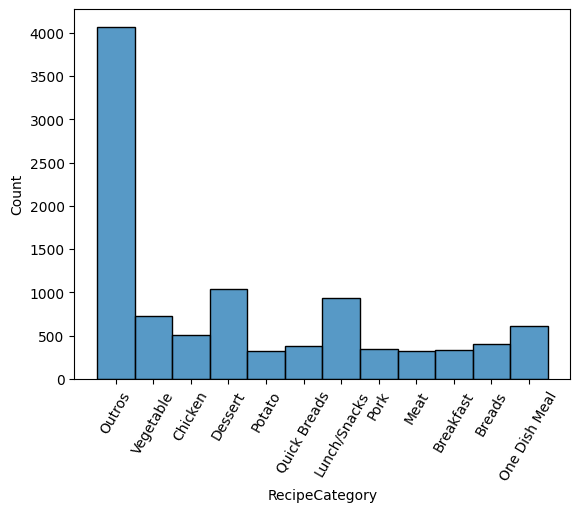

In [20]:
#histograma com as 12 categorias com mais receitas.

sns.histplot(filtro,  )
plt.xticks(rotation=60)
plt.show()

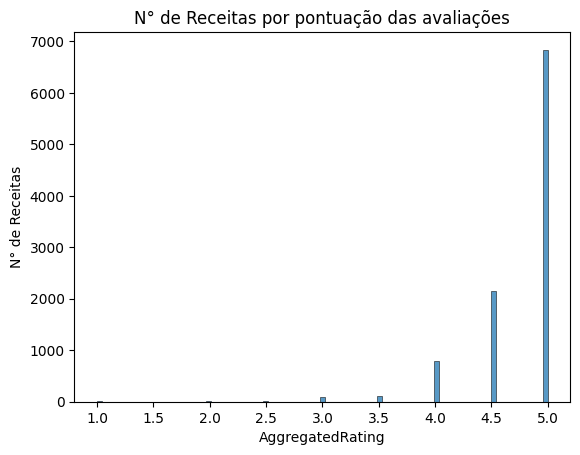

In [21]:
sns.histplot(recipes['AggregatedRating'])
plt.title('N° de Receitas por pontuação das avaliações')
#plt.savefig('Histograma_avaliação_receitas.png', format='png')
plt.ylabel('N° de Receitas');

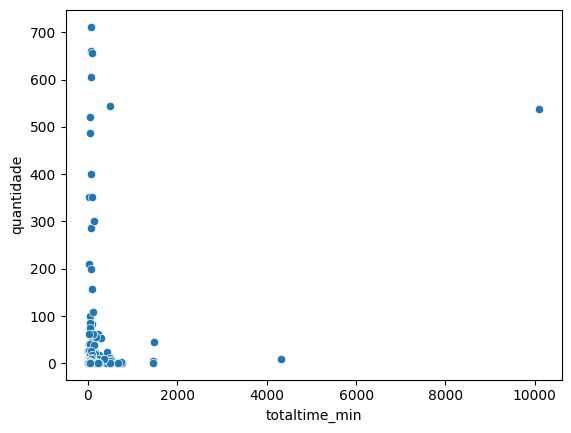

In [22]:
#Plot da distribuição da quantidade de receitas por tempo total

sns.scatterplot(x = recipes.totaltime_min, y = recipes.totaltime_min.value_counts())
plt.ylabel('quantidade')
plt.show()

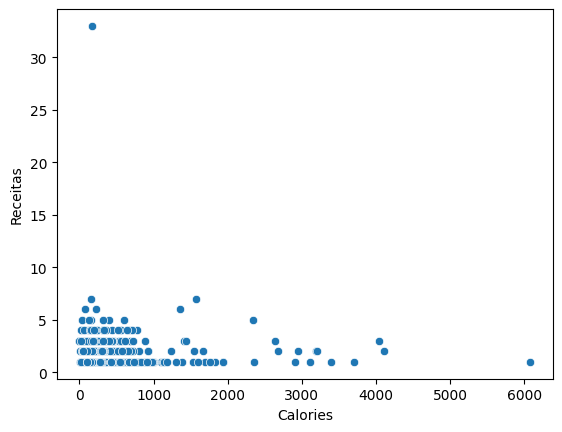

In [23]:
#Plot da distribuição das calorias

sns.scatterplot(x = recipes.Calories, y = recipes.Calories.value_counts())
plt.ylabel('Receitas')
plt.show()

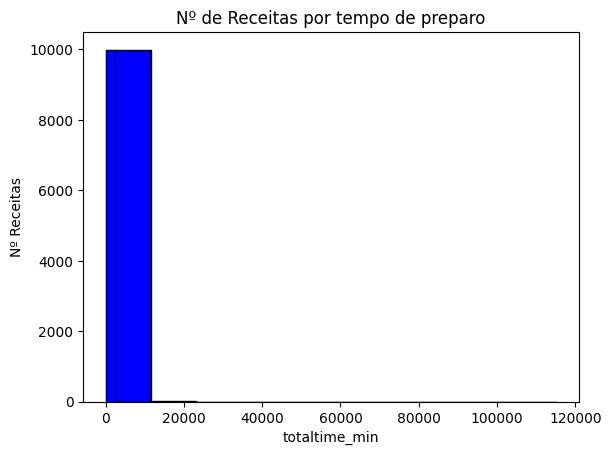

In [24]:

# matplotlib histogram
plt.hist(recipes['totaltime_min'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['totaltime_min'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por tempo de preparo')
plt.xlabel('totaltime_min')
plt.ylabel('Nº Receitas')
plt.show()

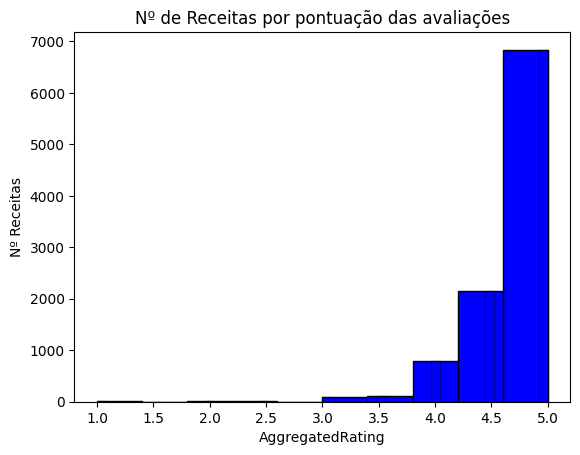

In [25]:

# matplotlib histogram

plt.hist(recipes['AggregatedRating'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['AggregatedRating'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por pontuação das avaliações')
plt.xlabel('AggregatedRating')
plt.ylabel('Nº Receitas')
plt.show()

**Resultados:**
- Existem muitas catégorias de receitas pequenas, que ao serem agrupadas, se tornam a maior catégoria presente no dataset, a catégoria que possuí mais entradas são *desert* seguida por *Lunch/snacks*;

- As notas atribuidas as nossas receitas não são confiaveis já que praticamente todas elas recebem 5 estrelas, fazendo com que haja pouca confiabilidade nessa váriavel;

- A maior distribuição de receitas se encontra no intevalo de 0m até 1900m, entretanto existem observasão com 10000m que equivalem a quase 7 dias de preparo;

##### Graficos e alterações antigas

#Plot da distribuição da quantidade de receitas por tempo de preparo

sns.scatterplot(x=recipes.preptime_min, y= recipes.preptime_min.value_counts())
plt.ylabel('Quantidade')
plt.show()

#Plot da distribuição da quantidade de receitas por tempo de cozimento

sns.scatterplot(x=recipes.cooktime_min, y= recipes.cooktime_min.value_counts())
plt.ylabel('Quantidade')
plt.show()

#dropando receitas que possuem mais de 72h de tempo de cozimento

lista = recipes[recipes.cooktime_min > 4320].index.to_list()
recipes.drop(index=lista, inplace=True)

#####

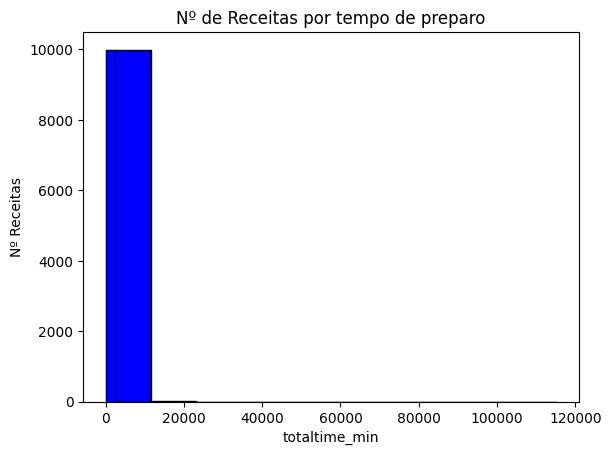

In [26]:

# matplotlib histogram
plt.hist(recipes['totaltime_min'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['totaltime_min'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por tempo de preparo')
plt.xlabel('totaltime_min')
plt.ylabel('Nº Receitas')
plt.show()

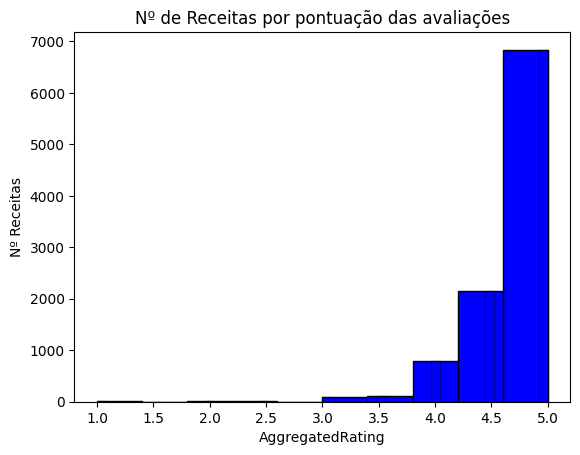

In [27]:

# matplotlib histogram
plt.hist(recipes['AggregatedRating'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['AggregatedRating'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por pontuação das avaliações')
plt.xlabel('AggregatedRating')
plt.ylabel('Nº Receitas')
plt.show()

### EDA 2

In [28]:
#dropando colunas adicionais:
recipes.drop(columns=['RecipeId', 'CookTime', 'PrepTime', 'TotalTime', 'reviews_in_dict', ], inplace=True)
recipes.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...",24,45,1485,Low
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,4,25,265,High
2,Best Lemonade,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...",0,35,35,Medium
3,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...",24,20,1460,High
4,Cabbage Soup,Make and share this Cabbage Soup recipe from F...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...","['46', '4', '1', '2', '1']","['plain tomato juice', 'cabbage', 'onion', 'ca...",4.5,103.6,4.0,NaN,['Mix everything together and bring to a boil....,0,50,50,Low


In [29]:
#explorando as colunas
recipes.describe().round(2)

,AggregatedRating,Calories,RecipeServings,totaltime_min
count,10000.00,10000.00,6147.00,10000.00
mean,4.77,493.86,7.62,126.62
std,0.41,742.02,7.51,1484.11
min,1.00,0.00,1.00,1.00
25%,4.50,177.78,4.00,27.00
50%,5.00,312.75,6.00,45.00
75%,5.00,514.92,8.00,72.00
max,5.00,13598.20,128.00,115230.00


In [30]:
#explorando as colunas
recipes.describe(include=np.object)

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,RecipeYield,RecipeInstructions,hours,minutes
count,10000,10000,10000,10000,10000,10000,2999,10000,10000,10000
unique,9653,9861,173,8084,9539,9920,1472,9999,44,60
top,Banana Bread,Make and share this Banana Bread recipe from F...,Dessert,['< 60 Mins'],['1'],[],1 loaf,['Cook beans according to package directions.'...,0,30
freq,12,7,1037,75,32,20,119,2,6330,1056


**Resultados:**

### Tratamento de texto

#### Funções

In [31]:
#função para remover pontos e virgulas substituindo por espaços.

def clean_text(text: str) -> str:
    cleaned = text.lower()
    cleaned = re.sub(r'[^\w\s]', ' ', cleaned)
    return cleaned

In [32]:
#Função para remover stopwords em inlgês:

stopwords = nltk.corpus.stopwords.words('english')

def stopwords_remove(x):
    text_list = word_tokenize(x)
    filtered_sentence = []
    filtered_sentence = [w for w in text_list if not w.lower() in stopwords]
    for w in text_list:
        if w not in stopwords:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    return text

In [33]:
#Função para obter rootwords:

ps = PorterStemmer()

def stemmer_words(text):
    word_tokens = word_tokenize(text)
    stemmer_words = ' '.join(ps.stem(word) for word in word_tokens)
    return stemmer_words

In [34]:
def normalizer(x):
    v = x
    normalized_v = normalize(v, axis=0).ravel()
    modulo = np.linalg.norm(normalized_v)
    return modulo

#### Abordagem


In [35]:
#Juntado todas as váriaveis de texto

recipes['recipe_text'] = (recipes['Name'] + ' ' + 
                         recipes['Description'] + ' ' + 
                         recipes['RecipeCategory'] + ' ' +
                         recipes['Keywords'] + ' ' +
                         recipes['RecipeIngredientParts'] + ' ' +  
                         recipes['RecipeInstructions'])

In [36]:
#removendo letras maiúsculas e pontuação

recipes['cleaned'] = recipes['recipe_text'].apply(lambda x:clean_text(x))

In [37]:
#removendo stopwords

recipes['cleaned'] = recipes['cleaned'].apply(lambda x: stopwords_remove(x))

In [38]:
#reduzindo algumas palavras para a raiz 

recipes['cleaned'] = recipes['cleaned'].apply(lambda x: stemmer_words(x))

In [39]:
#Treinando vetorizador

vec=TfidfVectorizer()
vec.fit(recipes['cleaned'])

#função para aplicar a vetorização no dataset

def vectorize_txt(text):
    list_word = []
    list_word.append(text)
    matrix = vec.transform(list_word)
    return matrix.toarray()

In [40]:
#Vetorizando texto

recipes['vectorize_text'] = recipes['cleaned'].apply(lambda x: vectorize_txt(x))

In [41]:
#Normalizando dados do vetor e calculando o módulo

recipes['vector_module'] = recipes['vectorize_text'].map(normalizer)

In [42]:
#lista = ['recipe_text','cleaned', 'vectorize_text']
#recipes.drop(columns=lista, inplace=True)

In [43]:
recipes.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification,recipe_text,cleaned,vectorize_text,vector_module
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...",24,45,1485,Low,Low-Fat Berry Blue Frozen Dessert Make and sha...,low fat berri blue frozen dessert make share l...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8.246211
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,4,25,265,High,Biryani Make and share this Biryani recipe fro...,biryani make share biryani recip food com chic...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",10.535654
2,Best Lemonade,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...",0,35,35,Medium,Best Lemonade This is from one of my first Go...,best lemonad one first good hous keep cookbook...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",8.366600
3,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...",24,20,1460,High,Carina's Tofu-Vegetable Kebabs This dish is be...,carina tofu veget kebab dish best prepar day a...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",11.704700
4,Cabbage Soup,Make and share this Cabbage Soup recipe from F...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...","['46', '4', '1', '2', '1']","['plain tomato juice', 'cabbage', 'onion', 'ca...",4.5,103.6,4.0,NaN,['Mix everything together and bring to a boil....,0,50,50,Low,Cabbage Soup Make and share this Cabbage Soup ...,cabbag soup make share cabbag soup recip food ...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6.557439


### Modelagem

In [60]:
np.linalg.norm(recipes['vectorize_text'][9])

1.0